# Imports

In [1]:
import os 
os.chdir("/home/ivanr/git/document_information_extraction/")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from src.data.wikipedia.wiki_data_base import retrieve_query

#  Constants

In [4]:
# Columns
COLUMNS = [
    "page_id",
    "n_sent_summary",
    "n_sent_body",
    "n_tokens_summary",
    "n_tokens_text",
]

COLUMNS_NUMERICAL = [
    "n_sent_summary",
    "n_sent_body",
    "n_tokens_summary",
    "n_tokens_text",
]

In [5]:
# Filters
MIN_N_SENT_BODY = 5
MIN_N_TOKENS_SUMMARY = 10
MIN_N_TOKENS_BODY = 50

In [58]:
plt.rcParams["figure.figsize"] = (12.5,7.5)

# Read data

In [6]:
query =f"""
SELECT *
FROM article_length
WHERE n_sent_body >= {MIN_N_SENT_BODY}
  AND n_tokens_summary >= {MIN_N_TOKENS_SUMMARY}
  AND n_tokens_text >= {MIN_N_TOKENS_BODY}
"""

data = retrieve_query(query)

In [7]:
data = pd.DataFrame(
    data,
    columns=COLUMNS,
)

In [8]:
print(f"Number of observations: {len(data)}")

Number of observations: 3839076


# Evaluate distribution

In [9]:
data.min()

page_id             12
n_sent_summary       1
n_sent_body          5
n_tokens_summary    10
n_tokens_text       50
dtype: int64

In [10]:
data.max()

page_id             67550874
n_sent_summary         37113
n_sent_body            37113
n_tokens_summary      830336
n_tokens_text         830336
dtype: int64

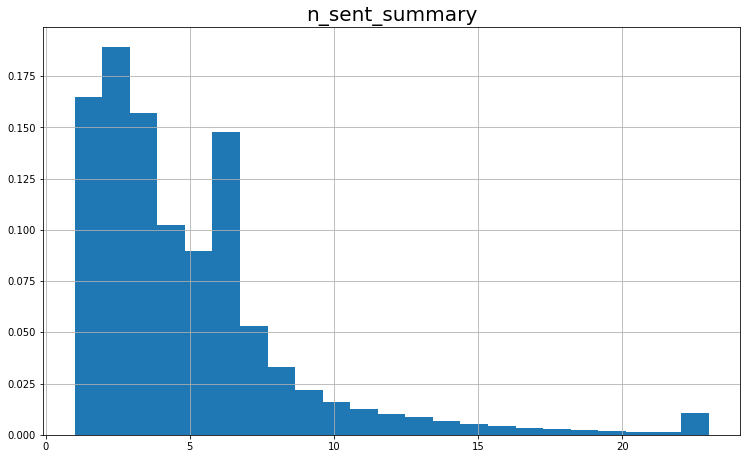

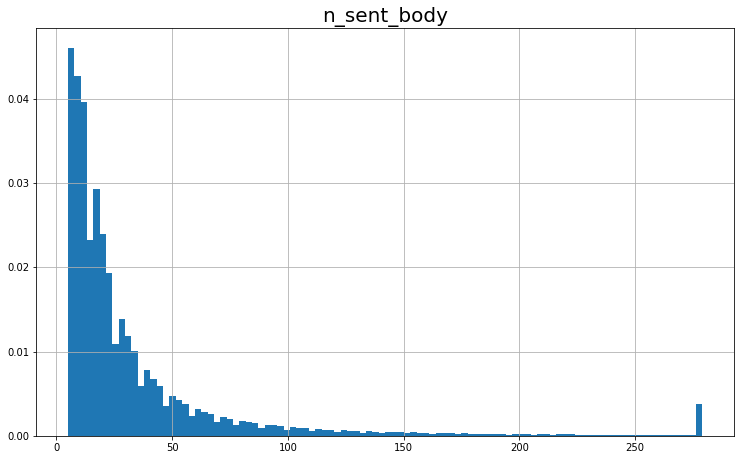

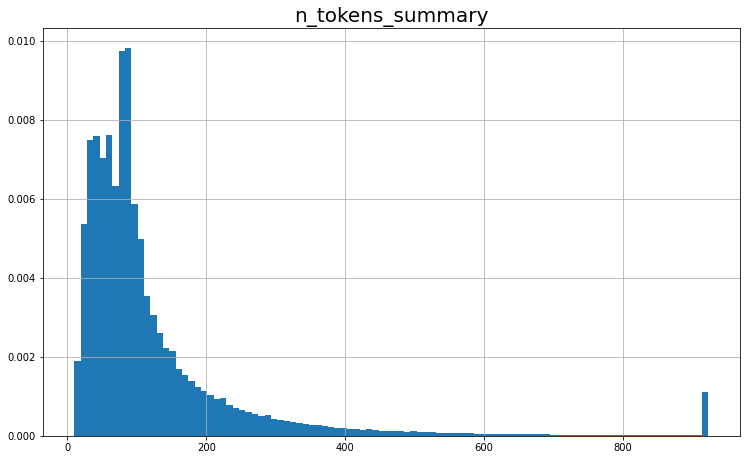

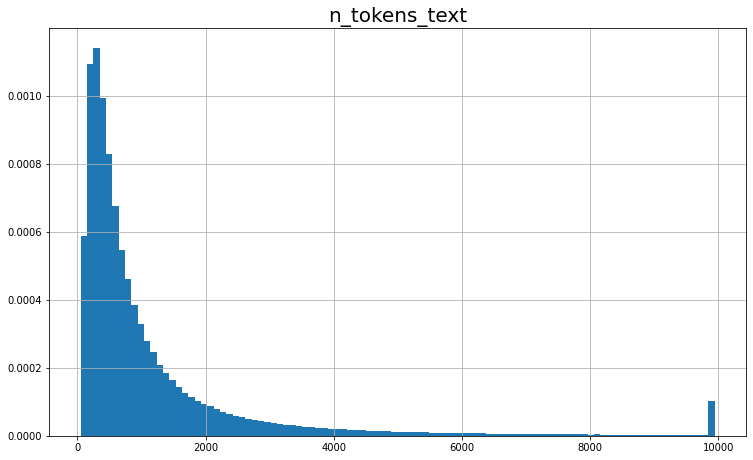

In [11]:
for var in COLUMNS_NUMERICAL:
    plt.figure(figsize = (12.5,7.5))
    plt.title(var, fontsize = 20)
    quantile = data[var].quantile(.99)
    data[var].clip(0,quantile).hist(bins = int(min(100,quantile)), density = True)
    plt.show()
    

# Ratios

In [12]:
data["sent_ratio_summary_body"]=data["n_sent_summary"]/data["n_sent_body"]
data["tokens_ratio_summary_body"]=data["n_tokens_summary"]/data["n_tokens_text"]

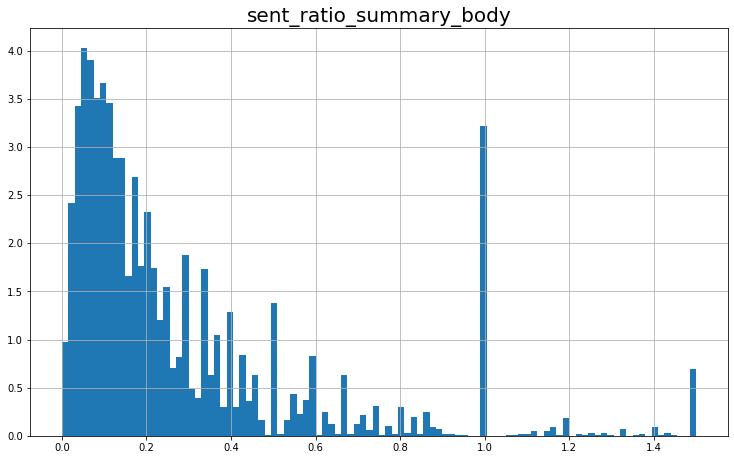

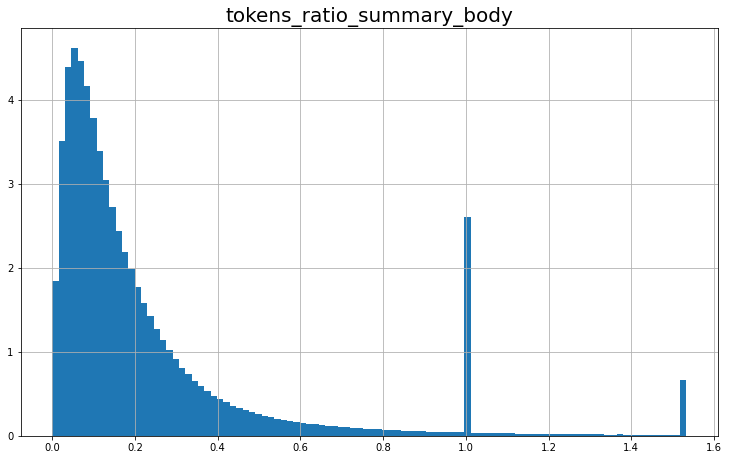

In [13]:
for var in ["sent_ratio_summary_body","tokens_ratio_summary_body"]:
    plt.figure(figsize = (12.5,7.5))
    plt.title(var, fontsize = 20)
    quantile = data[var].quantile(.99)
    data[var].clip(0,quantile).hist(bins = 100, density = True)
    plt.show()
    

# Joint plots

In [17]:
for var in COLUMNS_NUMERICAL :
    quantile = data[var].quantile(0.9999)
    data[var + "_clip"] = data[var].clip(0, quantile)
    
for var in ["sent_ratio_summary_body", "tokens_ratio_summary_body"] :
    data[var + "_clip"] = data[var].clip(0, 1)

In [54]:
import matplotlib.cm as cm
from matplotlib.colors import LogNorm


def plot_joint(data, x_label, y_label, bins=(100, 100)):

    x = data[x_label]
    y = data[y_label]

    ax1 = sns.jointplot(x=x, y=y)
    ax1.ax_joint.cla()
    plt.sca(ax1.ax_joint)

    plt.hist2d(x, y, bins=bins, cmap=cm.jet, norm=LogNorm())
    plt.xlabel(x_label, fontsize=13)
    plt.ylabel(y_label, fontsize=13)

    cbar_ax = ax1.fig.add_axes([1, 0.1, 0.03, 0.7])
    cb = plt.colorbar(cax=cbar_ax)
    cb.set_label(r"$\log_{10}$ density of points", fontsize=13)
    
    plt.show()

<Figure size 900x540 with 0 Axes>

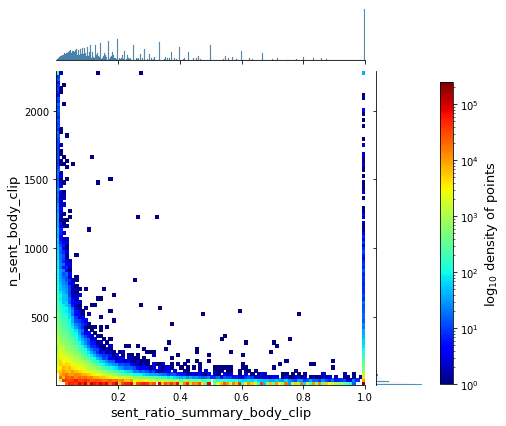

In [59]:
plot_joint(
    data,
    "sent_ratio_summary_body_clip",
    "n_sent_body_clip",
    bins=(100, 100),
)

<Figure size 900x540 with 0 Axes>

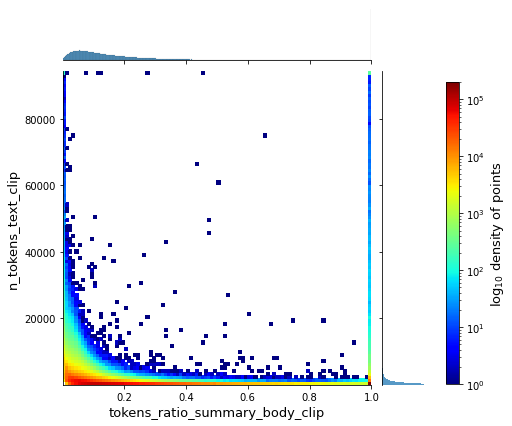

In [57]:
plot_joint(
    data,
    "tokens_ratio_summary_body_clip",
    "n_tokens_text_clip",
    bins=(100, 100),
)